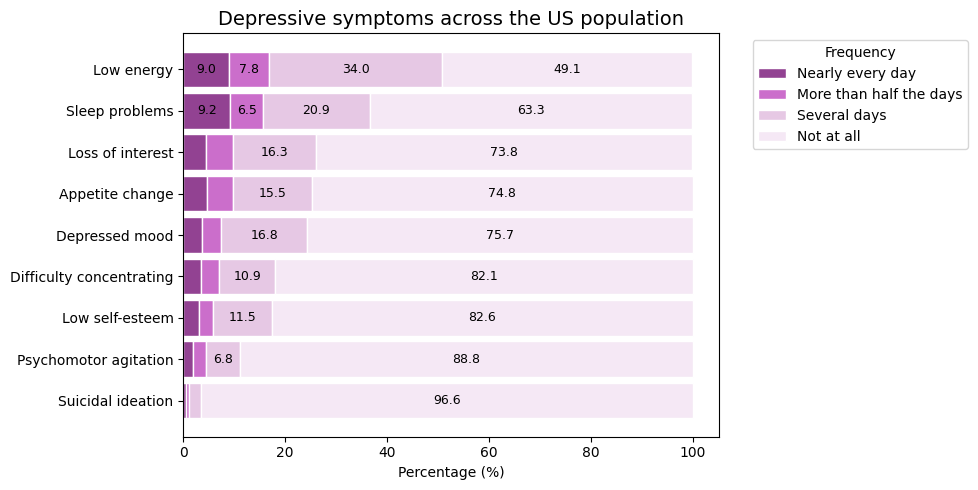

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati
df = pd.read_csv("Dataset/usa_symptoms.csv")
df = df.drop(columns=["Year", "Code"])
df = df[df["Entity"] != "Average across symptoms"]
df.set_index("Entity", inplace=True)

df_sorted = df.sort_values(by="Not at all", ascending=False)

colors_list = ["#924292", "#cb6ecb", "#e6c8e4", "#f5e8f5"]

#"#2e7d32", "#66bb6a", "#c8e6c9", "#e8f5e9"

fig, ax = plt.subplots(figsize=(10,5))

# Parametri per controllare spazio
bar_height = 0.3   
bar_gap = 0.05      

entities = df_sorted.index.tolist()
y_positions = range(len(entities))

# Disegno barre stacked manualmente
for i, entity in enumerate(entities):
    left = 0
    for j, col in enumerate(df_sorted.columns):
        value = df_sorted.loc[entity, col]
        ax.barh(
            y=i*(bar_height+bar_gap),   
            width=value,
            height=bar_height,
            left=left,
            color=colors_list[j],
            edgecolor="white"
        )
        if value >= 6.5:  
            ax.text(left + value/2, i*(bar_height+bar_gap), f"{value:.1f}",
                    va="center", ha="center", color="black", fontsize=9)
        left += value

# Set assi e labels
ax.set_yticks([i*(bar_height+bar_gap) for i in y_positions])
ax.set_yticklabels(entities)
ax.set_xlabel("Percentage (%)")
ax.set_title("Depressive symptoms across the US population", size=14)

# Legenda
ax.legend(df_sorted.columns, title="Frequency", bbox_to_anchor=(1.05,1))

plt.tight_layout()
plt.show()